<a href="https://colab.research.google.com/github/PuiPu/data_sci_final_project/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 匯入 github

In [4]:
# 使用個人訪問令牌克隆私有存儲庫
!git clone https://github.com/PuiPu/data_sci_final_project.git

Cloning into 'data_sci_final_project'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 9 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (9/9), 220.35 KiB | 1.22 MiB/s, done.
Resolving deltas: 100% (1/1), done.


# ARIMA first test (Gemini)

In [44]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# 讀取克隆的存儲庫中的 .csv 文件
df = pd.read_csv('/content/data_sci_final_project/aapl_us_d.csv')

# 開始日期
start_date = '1984-09-07'

# Set the date as the index
df.set_index('Date', inplace=True)
df.index = pd.date_range(start_date, periods=len(df), freq='D') # 'D' 表示按天

# Split the data into training and testing sets
train_data = df[:'2014-11-6']
test_data = df['2014-11-7':] # 先用到2023，照理講應該要到2024(總共14年)

# Build the ARIMA model
# model = ARIMA(train_data['Close'], order=(2, 1, 1))  # Adjust the order parameters as needed
# model_fit = model.fit()

# 新的預測起始日期
start_forecast_date = '2024-09-06' # 最後一筆資料

# 重新分割資料
train_end_date = pd.to_datetime(start_forecast_date) - pd.Timedelta(days=1)
train_data = df[:train_end_date]
test_data = df[train_end_date:]  # 測試集可以很短，甚至只包含一個數據點

# 建立模型並預測
model = ARIMA(train_data['Close'], order=(2, 1, 1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=10)

print(forecast)

# Forecast future prices
#forecast = model_fit.forecast(steps=10)  # Forecast for the next 10 days

# Print the forecasted prices
# print(forecast)

2012-04-13    220.876743
2012-04-14    220.904384
2012-04-15    220.912368
2012-04-16    220.914334
2012-04-17    220.914801
2012-04-18    220.914911
2012-04-19    220.914937
2012-04-20    220.914943
2012-04-21    220.914944
2012-04-22    220.914945
Freq: D, Name: predicted_mean, dtype: float64


# 畫出趨勢線

10080


IndexError: index -1 is out of bounds for axis 0 with size 0

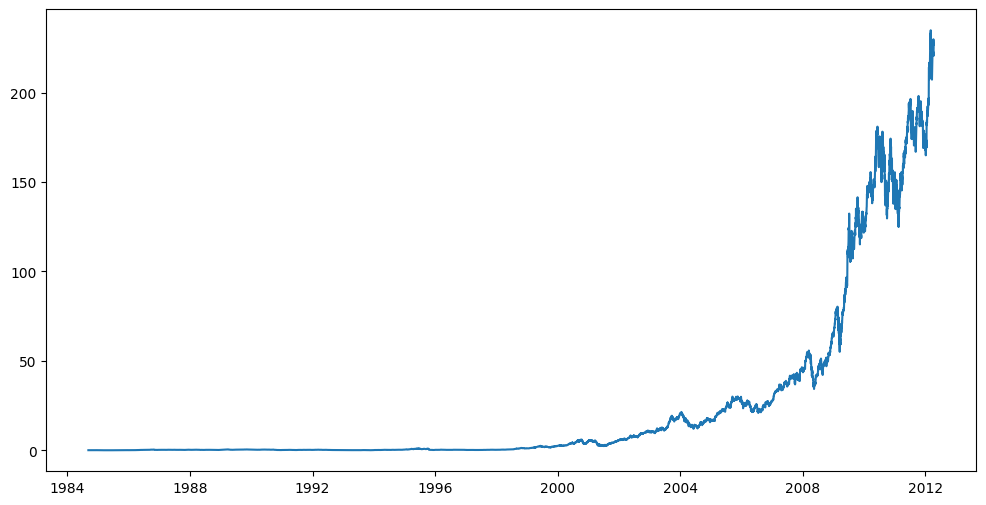

In [41]:
import matplotlib.pyplot as plt

print(len(train_data))

# 繪製圖表
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Close'], label='Training Data')
plt.plot(test_data.index, test_data['Close'], label='Test Data')

forecast_index = pd.date_range(start=test_data.index[-1], periods=len(forecast), freq='D')
plt.plot(forecast_index, forecast, label='Forecast', color='red')

plt.title('Apple Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.show()